## 1.Loading the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,roc_curve,auc

In [88]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

## 2.Loading the Dataset

In [6]:
df_heart=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/heart_attack/heart.csv')
df_heart.shape

(303, 14)

In [7]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 3.Exploratory Data Analysis

In [9]:
df_heart.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

From the summary table, we can see that the minimum value for cp column is 0. But as per our dataset, there is no description for 0. Let's convert it into 4 and classify it as asymptomatic.

In [10]:
df_heart.loc[(df_heart['cp']==0,'cp')]=4

In [11]:
df_heart.cp.value_counts()

4    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [12]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We can see that there are some columns which are originally categorical, but as misinterpreted as numerical column in the data. Let's change the datatype.

In [13]:
cols=['sex','cp','fbs','restecg','exng','slp','caa','thall','output']

In [14]:
for col in cols:
    df_heart[col]=df_heart[col].astype('category')

In [15]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [16]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

We can see that there are no missing values for the data.

In [17]:
#Checking for duplicates

In [18]:
sum(df_heart.duplicated())

1

There is 1 duplicate data,let's drop that before model building

In [19]:
df_heart=df_heart.drop_duplicates()

In [20]:
df_heart.shape

(302, 14)

In [21]:
#Checking the outliers

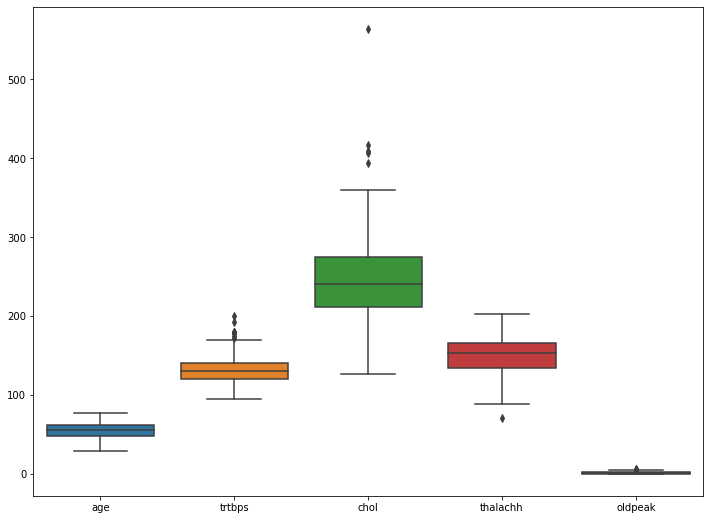

In [22]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df_heart)
plt.show()

Let's convert the chol data into categorical data, so as to take care of outliers in the data.

In [23]:
df_heart.chol.min(),df_heart.chol.max()

(126, 564)

In [24]:
df_heart.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [25]:
df_heart.thall.value_counts()

2    165
3    117
1     18
0      2
Name: thall, dtype: int64

In [26]:
df_heart['chol_cat']=pd.cut(df_heart.chol,bins=[120,200,240,565],labels=['good','borderline','high'])

In [27]:
df_heart.chol_cat.value_counts()

high          151
borderline    101
good           50
Name: chol_cat, dtype: int64

In [28]:
df_heart.groupby('chol_cat')['output'].value_counts()

chol_cat     
good        1    29
            0    21
borderline  1    63
            0    38
high        0    79
            1    72
Name: output, dtype: int64

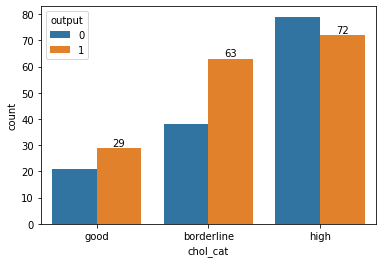

In [29]:
cp=sns.countplot(x='chol_cat',hue='output',data=df_heart)
cp.bar_label(cp.containers[1])
plt.show()

We can see that there are 72 positive outcomes with high cholesterol level in the blood.

We will drop the chol column since we do not require it now.

In [30]:
df_heart=df_heart.drop('chol',axis=1)

In [31]:
df_heart.thalachh.min(),df_heart.thalachh.max()

(71, 202)

In [32]:
num_cols=df_heart.select_dtypes(include=np.number)
num_cols.columns

Index(['age', 'trtbps', 'thalachh', 'oldpeak'], dtype='object')

In [33]:
cols=['trtbps','thalachh','oldpeak']

In [34]:
def boundaries(data,variable):
    LL=data[variable].quantile(.25)-((data[variable].quantile(.75)-data[variable].quantile(.25))*1.5)
    UL=data[variable].quantile(.75)+((data[variable].quantile(.75)-data[variable].quantile(.25))*1.5)
    return LL,UL

In [35]:
for col in cols:
    LL,UL=boundaries(df_heart,col)
    
    df_heart[col]=np.where(df_heart[col]<LL,LL,
                          np.where(df_heart[col]>UL,UL,df_heart[col]))

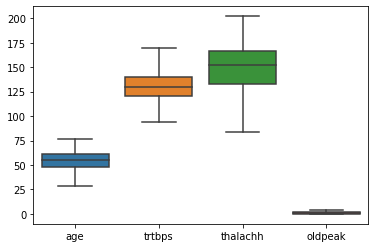

In [36]:
sns.boxplot(data=df_heart)
plt.show()

In [37]:
#Checking for Linearity

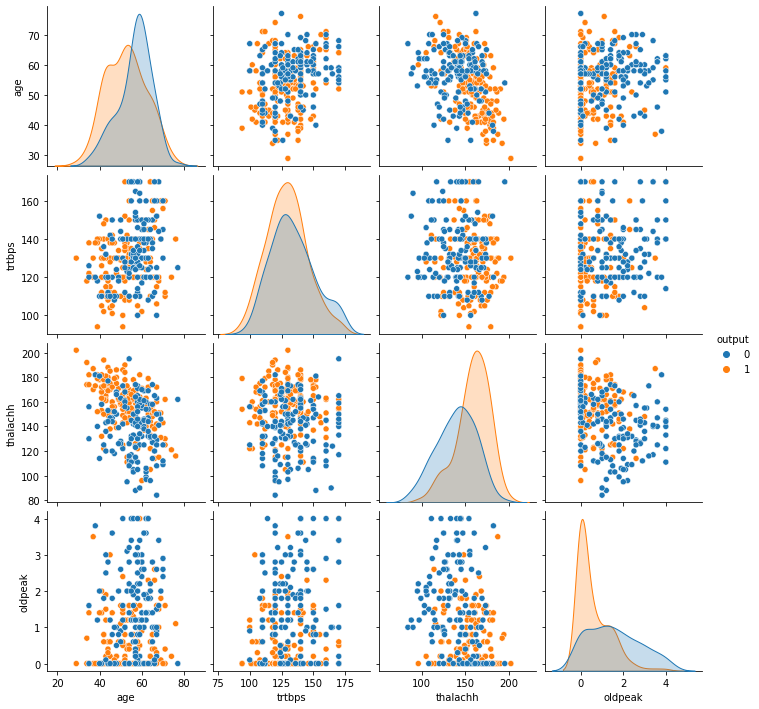

In [38]:
sns.pairplot(df_heart,hue='output')
plt.show()

We can see that there is no linear relationship among the independent features.

In [39]:
#Test for Correlation

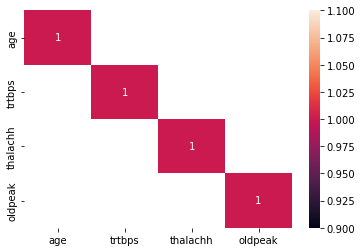

In [40]:
vcorr=df_heart.corr()

sns.heatmap(vcorr[(vcorr<-0.60) | (vcorr>0.60)],annot=True)

plt.show()

We can see that there is no strong correlation among the independent features.

In [41]:
#Test for Normality

In [42]:
column=['age', 'trtbps', 'thalachh', 'oldpeak']

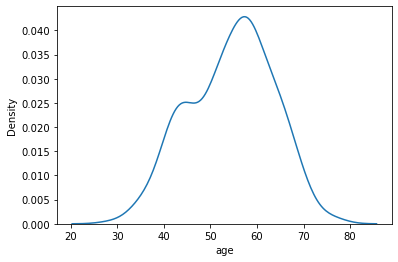

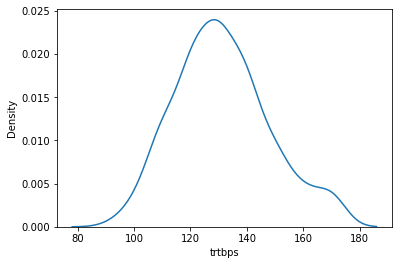

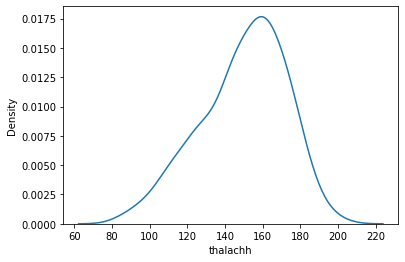

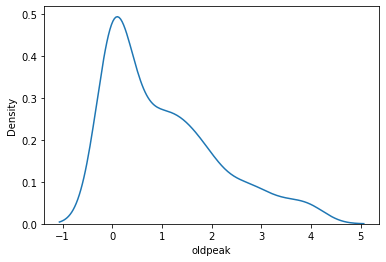

In [43]:
for col in column:
    sns.kdeplot(x=col,data=df_heart)
    plt.show()

In [44]:
df_heart.head()

,age,sex,cp,trtbps,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,chol_cat
0,63,1,3,145.0,1,0,150.0,0,2.3,0,0,1,1,borderline
1,37,1,2,130.0,0,1,187.0,0,3.5,0,0,2,1,high
2,41,0,1,130.0,0,0,172.0,0,1.4,2,0,2,1,borderline
3,56,1,1,120.0,0,1,178.0,0,0.8,2,0,2,1,borderline
4,57,0,4,120.0,0,1,163.0,1,0.6,2,0,2,1,high


In [45]:
#Converting the output column into numerical column

In [46]:
df_heart['output']=df_heart['output'].astype('int')

## 4.Dummy Encoding

In [52]:
#converting other categorical columns into numerical columns

In [53]:
df_heart_dummy=pd.get_dummies(df_heart,drop_first=True)

In [54]:
df_heart_dummy.shape

(302, 24)

## 5.Separating the Independent and Dependent Variables

In [56]:
X=df_heart_dummy.drop('output',axis=1)
y=df_heart_dummy['output']

## 6.PCA

In [59]:
#Scaling the data

In [62]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,age,trtbps,thalachh,oldpeak,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,...,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,chol_cat_borderline,chol_cat_high
0,0.949794,0.828927,0.017027,1.147606,0.682656,-0.630990,3.482877,-0.948352,2.389793,-1.0,...,-0.935829,-0.5237,-0.379393,-0.266312,-0.115857,3.972125,-1.097442,-0.795256,1.410709,-1.0
1,-1.928548,-0.075902,1.644957,2.230096,0.682656,1.584812,-0.287119,-0.948352,-0.418446,1.0,...,-0.935829,-0.5237,-0.379393,-0.266312,-0.115857,-0.251754,0.911210,-0.795256,-0.708864,1.0
2,-1.485726,-0.075902,0.984985,0.335739,-1.464866,-0.630990,-0.287119,-0.948352,-0.418446,-1.0,...,1.068571,-0.5237,-0.379393,-0.266312,-0.115857,-0.251754,0.911210,-0.795256,1.410709,-1.0
3,0.174856,-0.679121,1.248974,-0.205506,0.682656,-0.630990,-0.287119,-0.948352,-0.418446,1.0,...,1.068571,-0.5237,-0.379393,-0.266312,-0.115857,-0.251754,0.911210,-0.795256,1.410709,-1.0
4,0.285561,-0.679121,0.589003,-0.385921,-1.464866,-0.630990,-0.287119,1.054461,-0.418446,1.0,...,1.068571,-0.5237,-0.379393,-0.266312,-0.115857,-0.251754,0.911210,-0.795256,-0.708864,1.0


In [58]:
pca=PCA()

In [64]:
pca_heart=pca.fit_transform(df_X_scaled)
pca_heart

array([[ 0.8143953 , -1.33079349,  3.81366042, ..., -0.2690258 ,
         0.71516211, -0.0350886 ],
       [-1.63891812,  0.37769814,  0.26421539, ..., -0.25354295,
         0.84231006,  0.04092003],
       [-2.48614358, -0.50368434,  0.63058698, ...,  0.8693746 ,
        -0.36419401, -0.02785009],
       ...,
       [ 3.07490567, -0.55506705,  0.6412761 , ...,  0.33983672,
        -0.39949316,  0.00818145],
       [ 2.83163871, -1.16966912, -0.84426518, ...,  0.32907235,
         0.03528991,  0.00479543],
       [-1.05464656,  0.11465832,  1.70454465, ...,  0.95149353,
         0.18106955,  0.00416725]])

In [65]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.17816921 0.26653665 0.33970992 0.40771086 0.47021299 0.52324355
 0.57462132 0.62372269 0.67117617 0.71391257 0.7541722  0.79217814
 0.82657943 0.85980707 0.89054983 0.91475849 0.93713029 0.95773313
 0.97423233 0.98594884 0.99529851 0.99949571 1.        ]


With 19 features,we can explain 97.4% variance in the data.

In [66]:
df_pca_heart=pd.DataFrame(pca_heart[:,:19])
df_pca_heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.814395,-1.330793,3.813660,3.492820,-0.419244,1.880888,0.297904,2.494852,1.372245,-0.569382,0.092034,0.323981,-0.366362,0.431485,0.434538,0.654695,1.312558,-0.678673,-1.217479
1,-1.638918,0.377698,0.264215,-0.363594,0.778742,-2.020799,-0.172276,0.964949,-0.031775,-1.047287,1.604491,-0.209245,-0.470171,0.274735,-2.057596,-1.908912,0.645573,-0.280077,-0.541007
2,-2.486144,-0.503684,0.630587,-0.097723,-1.350629,-0.093249,0.357390,0.110643,-1.002630,0.381866,-0.020968,-1.109754,-0.340968,-0.966043,-0.135870,0.047287,1.308034,-0.370070,0.190305
3,-2.481395,-1.500285,0.254262,0.031144,-0.851525,0.324349,0.331540,-0.323058,-0.477607,-0.208478,-0.295561,0.326220,0.260667,0.327898,-0.297842,-0.635419,-0.488005,0.117254,-1.005847
4,-0.988782,1.283550,-1.804039,-0.610834,-1.577299,0.066546,0.105564,-0.505006,0.128335,0.216805,-0.157336,0.713978,-1.104625,0.428090,-0.367814,0.609549,0.503525,0.628274,-1.108783


In [67]:
X=df_pca_heart

## 7.Splitting into train and test set

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1)

In [73]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((256, 19), (46, 19), (256,), (46,))

## 8.Scaling the data

In [75]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## 9.Finding the best parameters

In [77]:
#GridSearchCV

In [78]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [79]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [80]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [81]:
print('Best parameters are: ',gs_model.best_params_)

Best parameters are:  {'max_depth': 8, 'min_samples_split': 15, 'n_estimators': 100}


In [82]:
#Finding suitable k in KNN

In [83]:
k_values=range(3,21)

acc_score={}

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,y_pred)

In [84]:
max(acc_score.values())

0.8695652173913043

In [85]:
max(acc_score,key=acc_score.get)

4

## 10.Model Building

In [86]:
models=[LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),
        RandomForestClassifier(n_estimators=100,min_samples_split=15,max_depth=8),XGBClassifier(dual=False),
       KNeighborsClassifier(n_neighbors=4),AdaBoostClassifier(),GradientBoostingClassifier(),
       LGBMClassifier(),CatBoostClassifier(),SVC(kernel='linear'),SVC(kernel='rbf'),SVC(kernel='sigmoid'),SVC(kernel='poly'),GaussianNB()]

In [87]:
for i in range(16):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy: ',accuracy_score(y_test,y_pred))
    print('Recall Score: ',recall_score(y_test,y_pred))
    
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    print('AUC Score: ',auc(fpr,tpr))
    
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    
    print()

LogisticRegression(): 
Accuracy:  0.8043478260869565
Recall Score:  0.875
AUC Score:  0.8011363636363636
Confusion Matrix: 
[[16  6]
 [ 3 21]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.78      0.88      0.82        24

    accuracy                           0.80        46
   macro avg       0.81      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46


SGDClassifier(): 
Accuracy:  0.7608695652173914
Recall Score:  0.875
AUC Score:  0.7556818181818181
Confusion Matrix: 
[[14  8]
 [ 3 21]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.72      0.88      0.79        24

    accuracy                           0.76        46
   macro avg       0.77      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46


DecisionTreeCla

46:	learn: 0.5355434	total: 560ms	remaining: 11.4s
47:	learn: 0.5332304	total: 569ms	remaining: 11.3s
48:	learn: 0.5310199	total: 575ms	remaining: 11.2s
49:	learn: 0.5283007	total: 584ms	remaining: 11.1s
50:	learn: 0.5262722	total: 591ms	remaining: 11s
51:	learn: 0.5240935	total: 600ms	remaining: 10.9s
52:	learn: 0.5215639	total: 608ms	remaining: 10.9s
53:	learn: 0.5187609	total: 617ms	remaining: 10.8s
54:	learn: 0.5167280	total: 625ms	remaining: 10.7s
55:	learn: 0.5139488	total: 633ms	remaining: 10.7s
56:	learn: 0.5113254	total: 641ms	remaining: 10.6s
57:	learn: 0.5088925	total: 649ms	remaining: 10.5s
58:	learn: 0.5065344	total: 659ms	remaining: 10.5s
59:	learn: 0.5034634	total: 667ms	remaining: 10.4s
60:	learn: 0.5012611	total: 675ms	remaining: 10.4s
61:	learn: 0.4986044	total: 683ms	remaining: 10.3s
62:	learn: 0.4964425	total: 690ms	remaining: 10.3s
63:	learn: 0.4945734	total: 698ms	remaining: 10.2s
64:	learn: 0.4928017	total: 706ms	remaining: 10.2s
65:	learn: 0.4902864	total: 714ms

212:	learn: 0.2871157	total: 1.88s	remaining: 6.96s
213:	learn: 0.2864895	total: 1.89s	remaining: 6.94s
214:	learn: 0.2854541	total: 1.9s	remaining: 6.93s
215:	learn: 0.2847639	total: 1.91s	remaining: 6.92s
216:	learn: 0.2840373	total: 1.92s	remaining: 6.91s
217:	learn: 0.2832441	total: 1.92s	remaining: 6.9s
218:	learn: 0.2825696	total: 1.93s	remaining: 6.89s
219:	learn: 0.2817333	total: 1.94s	remaining: 6.88s
220:	learn: 0.2808239	total: 1.95s	remaining: 6.87s
221:	learn: 0.2799650	total: 1.96s	remaining: 6.86s
222:	learn: 0.2792464	total: 1.97s	remaining: 6.85s
223:	learn: 0.2786320	total: 1.97s	remaining: 6.84s
224:	learn: 0.2779493	total: 1.98s	remaining: 6.83s
225:	learn: 0.2773947	total: 1.99s	remaining: 6.82s
226:	learn: 0.2766358	total: 2s	remaining: 6.8s
227:	learn: 0.2757910	total: 2s	remaining: 6.79s
228:	learn: 0.2748393	total: 2.01s	remaining: 6.78s
229:	learn: 0.2738845	total: 2.02s	remaining: 6.76s
230:	learn: 0.2732113	total: 2.03s	remaining: 6.75s
231:	learn: 0.2726839

393:	learn: 0.1888782	total: 3.34s	remaining: 5.14s
394:	learn: 0.1883236	total: 3.35s	remaining: 5.13s
395:	learn: 0.1880421	total: 3.36s	remaining: 5.12s
396:	learn: 0.1876002	total: 3.37s	remaining: 5.11s
397:	learn: 0.1872087	total: 3.37s	remaining: 5.1s
398:	learn: 0.1867494	total: 3.38s	remaining: 5.09s
399:	learn: 0.1863803	total: 3.39s	remaining: 5.09s
400:	learn: 0.1858095	total: 3.4s	remaining: 5.08s
401:	learn: 0.1854307	total: 3.41s	remaining: 5.07s
402:	learn: 0.1851682	total: 3.42s	remaining: 5.06s
403:	learn: 0.1848491	total: 3.42s	remaining: 5.05s
404:	learn: 0.1842950	total: 3.43s	remaining: 5.04s
405:	learn: 0.1838310	total: 3.44s	remaining: 5.04s
406:	learn: 0.1834914	total: 3.45s	remaining: 5.03s
407:	learn: 0.1831562	total: 3.46s	remaining: 5.02s
408:	learn: 0.1827840	total: 3.47s	remaining: 5.01s
409:	learn: 0.1823342	total: 3.47s	remaining: 5s
410:	learn: 0.1820194	total: 3.48s	remaining: 4.99s
411:	learn: 0.1817478	total: 3.49s	remaining: 4.98s
412:	learn: 0.181

555:	learn: 0.1390053	total: 4.61s	remaining: 3.68s
556:	learn: 0.1387383	total: 4.61s	remaining: 3.67s
557:	learn: 0.1384477	total: 4.62s	remaining: 3.66s
558:	learn: 0.1382412	total: 4.63s	remaining: 3.65s
559:	learn: 0.1379527	total: 4.64s	remaining: 3.64s
560:	learn: 0.1377824	total: 4.65s	remaining: 3.63s
561:	learn: 0.1375304	total: 4.65s	remaining: 3.63s
562:	learn: 0.1372425	total: 4.66s	remaining: 3.62s
563:	learn: 0.1369885	total: 4.67s	remaining: 3.61s
564:	learn: 0.1367602	total: 4.68s	remaining: 3.6s
565:	learn: 0.1365269	total: 4.69s	remaining: 3.6s
566:	learn: 0.1363962	total: 4.7s	remaining: 3.59s
567:	learn: 0.1361794	total: 4.7s	remaining: 3.58s
568:	learn: 0.1358961	total: 4.71s	remaining: 3.57s
569:	learn: 0.1357122	total: 4.72s	remaining: 3.56s
570:	learn: 0.1353869	total: 4.73s	remaining: 3.55s
571:	learn: 0.1351002	total: 4.74s	remaining: 3.54s
572:	learn: 0.1348097	total: 4.74s	remaining: 3.53s
573:	learn: 0.1345664	total: 4.75s	remaining: 3.52s
574:	learn: 0.13

716:	learn: 0.1063371	total: 5.91s	remaining: 2.33s
717:	learn: 0.1061602	total: 5.92s	remaining: 2.33s
718:	learn: 0.1059964	total: 5.93s	remaining: 2.32s
719:	learn: 0.1058448	total: 5.94s	remaining: 2.31s
720:	learn: 0.1056083	total: 5.94s	remaining: 2.3s
721:	learn: 0.1053302	total: 5.95s	remaining: 2.29s
722:	learn: 0.1050317	total: 5.96s	remaining: 2.28s
723:	learn: 0.1048619	total: 5.97s	remaining: 2.27s
724:	learn: 0.1046237	total: 5.98s	remaining: 2.27s
725:	learn: 0.1044977	total: 5.99s	remaining: 2.26s
726:	learn: 0.1043910	total: 5.99s	remaining: 2.25s
727:	learn: 0.1042355	total: 6s	remaining: 2.24s
728:	learn: 0.1040296	total: 6.01s	remaining: 2.23s
729:	learn: 0.1038722	total: 6.02s	remaining: 2.23s
730:	learn: 0.1036421	total: 6.03s	remaining: 2.22s
731:	learn: 0.1033725	total: 6.04s	remaining: 2.21s
732:	learn: 0.1032512	total: 6.04s	remaining: 2.2s
733:	learn: 0.1032053	total: 6.05s	remaining: 2.19s
734:	learn: 0.1030126	total: 6.06s	remaining: 2.19s
735:	learn: 0.102

890:	learn: 0.0812798	total: 7.22s	remaining: 883ms
891:	learn: 0.0811189	total: 7.23s	remaining: 875ms
892:	learn: 0.0809992	total: 7.23s	remaining: 867ms
893:	learn: 0.0808823	total: 7.24s	remaining: 858ms
894:	learn: 0.0807302	total: 7.25s	remaining: 850ms
895:	learn: 0.0806044	total: 7.25s	remaining: 842ms
896:	learn: 0.0805485	total: 7.26s	remaining: 834ms
897:	learn: 0.0804851	total: 7.27s	remaining: 825ms
898:	learn: 0.0803115	total: 7.27s	remaining: 817ms
899:	learn: 0.0802497	total: 7.28s	remaining: 809ms
900:	learn: 0.0800967	total: 7.29s	remaining: 801ms
901:	learn: 0.0799811	total: 7.29s	remaining: 792ms
902:	learn: 0.0798160	total: 7.3s	remaining: 784ms
903:	learn: 0.0796596	total: 7.3s	remaining: 776ms
904:	learn: 0.0795473	total: 7.31s	remaining: 768ms
905:	learn: 0.0793843	total: 7.32s	remaining: 760ms
906:	learn: 0.0792454	total: 7.33s	remaining: 751ms
907:	learn: 0.0791497	total: 7.33s	remaining: 743ms
908:	learn: 0.0790056	total: 7.34s	remaining: 735ms
909:	learn: 0.

We can see that using CatBoostClassifier model, we get a model accuracy of 85% and a recall score of 96%

## 11.Neural Network

In [89]:
X_train_scaled.shape

(256, 19)

In [90]:
classifier=Sequential()

In [92]:
classifier.add(Dense(128,kernel_initializer='uniform',activation='relu',input_dim=19))
Dropout(0.01)
classifier.add(Dense(32,kernel_initializer='uniform',activation='relu'))
Dropout(0.01)

In [94]:
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [95]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [97]:
earlystop=EarlyStopping(monitor='loss',patience=3)

In [98]:
classifier.fit(X_train_scaled,y_train,batch_size=16,epochs=100,validation_data=[X_train_scaled,y_train],callbacks=earlystop)

Epoch 1/100
16/16 [==============================] - 2s 33ms/step - loss: 0.6943 - accuracy: 0.4531 - val_loss: 0.6940 - val_accuracy: 0.4531
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6939 - accuracy: 0.4531 - val_loss: 0.6935 - val_accuracy: 0.4531
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.4531 - val_loss: 0.6931 - val_accuracy: 0.5469
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5469 - val_loss: 0.6927 - val_accuracy: 0.5469
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5469 - val_loss: 0.6925 - val_accuracy: 0.5469
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6923 - accuracy: 0.5469 - val_loss: 0.6921 - val_accuracy: 0.5469
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5469 - val_loss: 0.6917 - val_accuracy: 0.5469
Epoch 8/100


Epoch 59/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5181 - accuracy: 0.9609 - val_loss: 0.5167 - val_accuracy: 0.9609
Epoch 60/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5155 - accuracy: 0.9609 - val_loss: 0.5142 - val_accuracy: 0.9609
Epoch 61/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5130 - accuracy: 0.9609 - val_loss: 0.5117 - val_accuracy: 0.9609
Epoch 62/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5106 - accuracy: 0.9609 - val_loss: 0.5092 - val_accuracy: 0.9609
Epoch 63/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5081 - accuracy: 0.9609 - val_loss: 0.5068 - val_accuracy: 0.9609
Epoch 64/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5057 - accuracy: 0.9609 - val_loss: 0.5044 - val_accuracy: 0.9609
Epoch 65/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5033 - accuracy: 0.9609 - val_loss: 0.5020 - val_accuracy: 0.9609
E

In [99]:
y_pred=classifier.predict(X_test_scaled)

2/2 [==============================] - 0s 12ms/step


In [101]:
y_pred=np.round(y_pred)

In [102]:
print(confusion_matrix(y_test,y_pred))

[[15  7]
 [ 2 22]]


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.76      0.92      0.83        24

    accuracy                           0.80        46
   macro avg       0.82      0.80      0.80        46
weighted avg       0.82      0.80      0.80        46



We can see that using Neural network, the model is 80% accurate with a recall value of 92%

So we can conclude that CatBoost Model works best with this dataset for predicting the output classes.